<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/Michelle_ML_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image, display
__author__ = "Mayur Kulkarni <mayur.kulkarni@xoriant.com>"

In [ ]:
""" this is my comments  """

' this is my comments  '

In [ ]:
def load_data_set():
    """
    Loads the iris data set

    :return:        data set instance
    """
    iris = load_iris()
    return iris

In [ ]:
def train_model(iris):
    """
    Train decision tree classifier

    :param iris:    iris data set instance
    :return:        classifier instance
    """
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(iris.data, iris.target)
    return clf

In [ ]:
iris_data = load_iris()

In [ ]:
def display_image(clf, iris):
    """
    Displays the decision tree image
    :param clf:     classifier instance
    :param iris:    iris data set instance
    """
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(data=graph.create_png()))

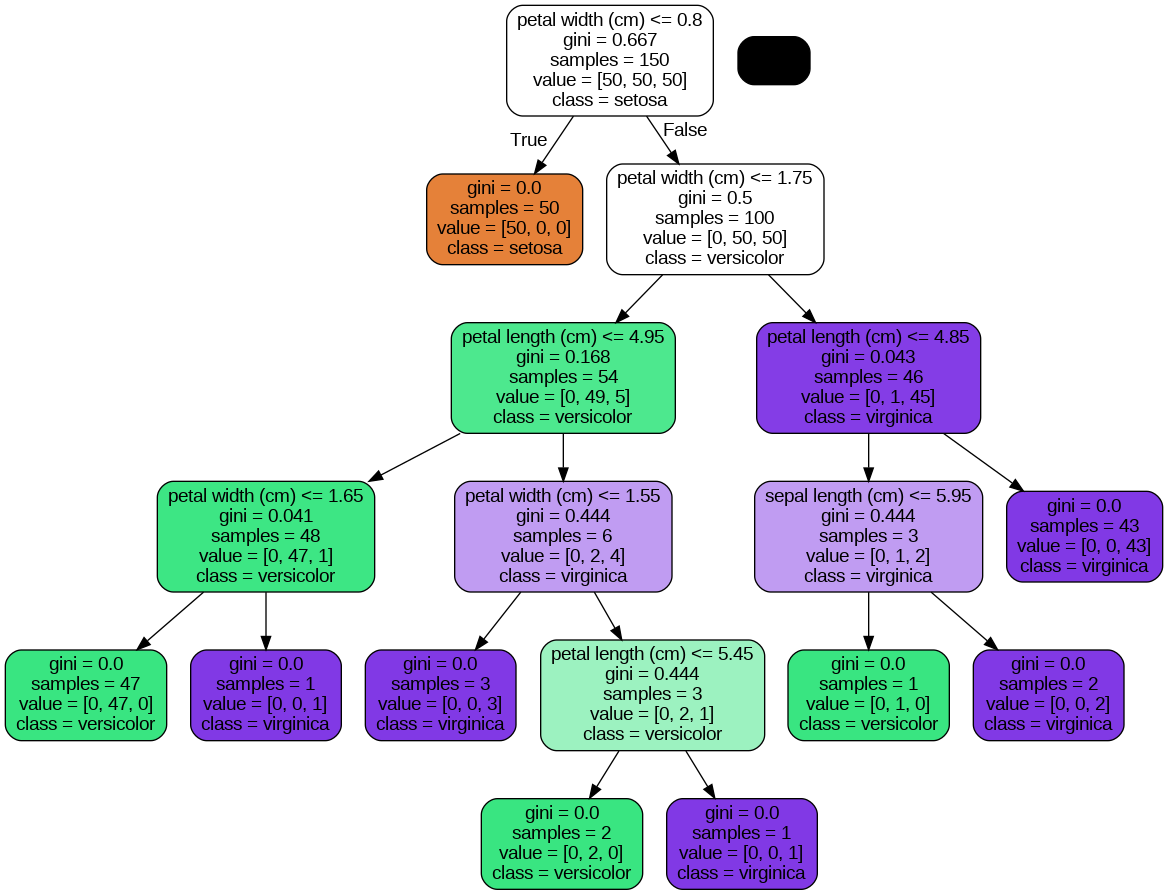

In [ ]:
if __name__ == '__main__':
    iris_data = load_iris()
    decision_tree_classifier = train_model(iris_data)
    display_image(clf=decision_tree_classifier, iris=iris_data)

In [ ]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [ ]:
print (iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
# print(iris_data)

# Improve the model by a. Cost-complexity Pruning (CCP)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE for oversampling (if dealing with imbalanced classes)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Feature selection using SelectKBest
k_best_selector = SelectKBest(k='all')  # Use k='all' to include all features
X_train_selected = k_best_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = k_best_selector.transform(X_test_imputed)


# Cost-Complexity Pruning (CCP)

In [ ]:
ccp_alpha_values = np.linspace(0.03, 0.5, 10)
accuracy_scores = []

for ccp_alpha in ccp_alpha_values:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    cv_scores = cross_val_score(clf_pruned, X_train_selected, y_train_resampled, cv=5)
    accuracy_scores.append(np.mean(cv_scores))

best_ccp_alpha = ccp_alpha_values[np.argmax(accuracy_scores)]
print(f"Best CCP Alpha: {best_ccp_alpha}")

Best CCP Alpha: 0.03


In [ ]:
# Train a Decision Tree classifier with Cost-Complexity Pruning
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
clf_pruned.fit(X_train_selected, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=42)

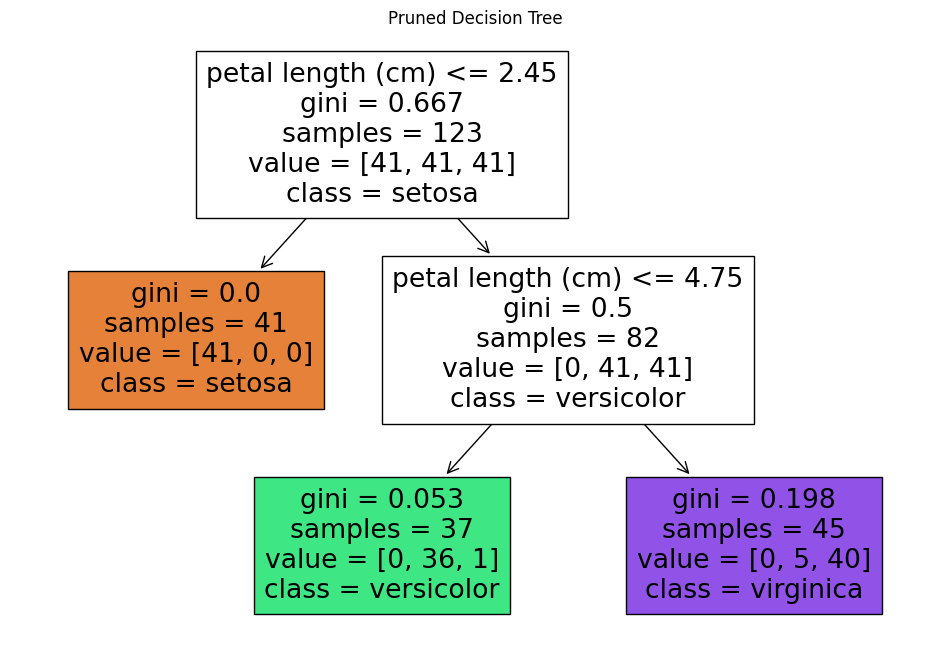

In [ ]:
# Visualize the original decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# Improve the model by using b. Bagging (Random Forest)

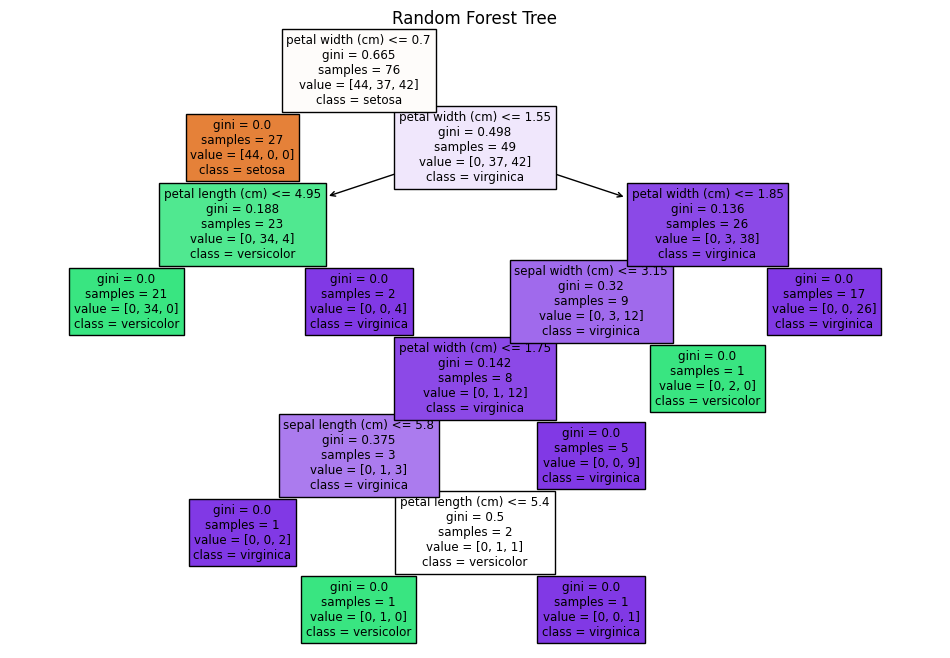

In [ ]:
# Random Forest (Bagging)
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the Random Forest classifier on the training data
rf_clf.fit(X_train_selected, y_train_resampled)

# Visualize one of the trees in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_clf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest Tree")
plt.show()

# Improve the model by using c. Boosting

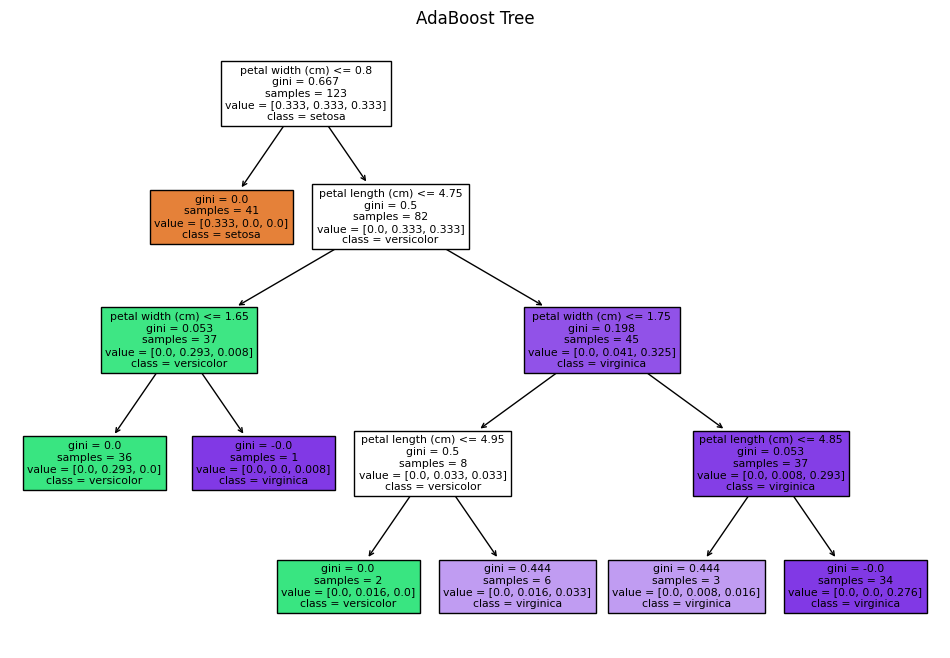

In [ ]:
# AdaBoost (Boosting)
#ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
ada_clf.fit(X_train_selected, y_train_resampled)

# Visualize one of the trees in the AdaBoost
plt.figure(figsize=(12, 8))
plot_tree(ada_clf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("AdaBoost Tree")
plt.show()

Support Vector Machine (SVM) learning comprison: SVM doesn't exhibit a decision tree model because it is a hyperplane in the feature space to optimize data separation, relying on a mathematical decision boundary, and its visualization highlights support vectors & margins in the space.

In [ ]:
svm_clf = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_clf.fit(X_train_selected, y_train_resampled)

# Visualize decision boundary for SVM (for 2D features)
if X_train_selected.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train_resampled, cmap='viridis', edgecolors='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title('SVM Decision Boundary')
    plt.show()

# Evaluate the models
y_pred_pruned = clf_pruned.predict(X_test_selected)
y_pred_rf = rf_clf.predict(X_test_selected)
y_pred_ada = ada_clf.predict(X_test_selected)
y_pred_svm = svm_clf.predict(X_test_selected)

# Compare and print results
print(f"Accuracy with Pruned Decision Tree: {accuracy_score(y_test, y_pred_pruned)}")
print(f"Accuracy with Random Forest: {accuracy_score(y_test, y_pred_rf)}")
print(f"Accuracy with AdaBoost: {accuracy_score(y_test, y_pred_ada)}")
print(f"Accuracy with SVM: {accuracy_score(y_test, y_pred_svm)}")

Accuracy with Pruned Decision Tree: 1.0
Accuracy with Random Forest: 1.0
Accuracy with AdaBoost: 1.0
Accuracy with SVM: 1.0


In [ ]:
# Compare with the original Decision Tree
clf_original = DecisionTreeClassifier(random_state=42)
cv_scores_original = cross_val_score(clf_original, X_train_selected, y_train_resampled, cv=5)
accuracy_original = np.mean(cv_scores_original)
print(f"Accuracy with Original Decision Tree: {accuracy_original}")

# Evaluate improvements
if accuracy_score(y_test, y_pred_pruned) > accuracy_original:
    print(f"Pruning improved the Decision Tree model. {accuracy_score(y_test, y_pred_pruned)}")
elif accuracy_score(y_test, y_pred_pruned) < accuracy_original:
    print("Pruning did not improve the Decision Tree model.")

if accuracy_score(y_test, y_pred_rf) > accuracy_original:
    print("Random Forest improved the Decision Tree model.")
elif accuracy_score(y_test, y_pred_rf) < accuracy_original:
    print("Random Forest did not improve the Decision Tree model.")

if accuracy_score(y_test, y_pred_ada) > accuracy_original:
    print("AdaBoost improved the Decision Tree model.")
elif accuracy_score(y_test, y_pred_ada) < accuracy_original:
    print("AdaBoost did not improve the Decision Tree model.")

if accuracy_score(y_test, y_pred_svm) > accuracy_original:
    print("SVM improved the Decision Tree model.")
elif accuracy_score(y_test, y_pred_svm) < accuracy_original:
    print("SVM did not improve the Decision Tree model.")

Accuracy with Original Decision Tree: 0.9353333333333333
Pruning improved the Decision Tree model. <function accuracy_score at 0x7a694728c5e0>
Random Forest improved the Decision Tree model.
AdaBoost improved the Decision Tree model.
SVM improved the Decision Tree model.
